In [33]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats

# Homework 2

This is Homework 2. Please write code in the notebook below that accomplishes the requested tasks. Submit your completed notebook to Canvas as a `.ipynb` file. You should write code in places where you see `...` below.


## Problem 1 (25 points)

The final project for the course will be a visual presentation of a dataset that you analyze. Your presentation will include a description of your dataset, an overview of your chosen analysis method, and some conclusions that you draw from your data. To start working toward this, you should:

-  Identify a dataset you would like to work with. It does not have to be explicitly related to an example we have talked about in class. In fact, something related to a hobby, previous work/research experience, or extracurricular activity would be better. This way, you have a personal connection to the data, and can ask interesting questions about it.
-  Come up with an interesting research question related to the data. It should be something that's not necessarily obvious about the data (e.g., more complicated than the mean/standard devaition), but also a question that you can quantitatively answer using the data.
-  Begin thinking about what analysis methods you might use to help answer this question. Keep in mind that we will cover several more analysis methods before the end of the course, so it doesn't have to be a technique we've already covered. You can also use analysis techniques we have not covered in the course, as long as the method is appropriate for your data and research question.

Please submit 2-3 paragraphs addressing the points above, either in the body of this notebook or an external document. If you have questions, or would like to brainstorm ideas for datasets and/or analysis techniques, feel free to reach out.

**NOTE** All members of the group _may_ work on the same document, and/or submit the same content for this question. This is the _only_ question on the HW on which you and your group mates are allowed to submit the same answer.


# Report

-  ## Dataset link

   -  https://www.kaggle.com/datasets/mexwell/steamgames/data

-  ## Paragraph

   -  Our final project will use a dataset that holds various information about Steam games. Information includes things like the amount of people who potentially own a particular game, the genre, the price of the game, metacritic score, etc. Our question is, for which genre does the metacritic score matter the most in terms of sold units.

   -  Our first step would be to make a scatter plot based on the metacritic score and the number of users who own the game for each genre. For each of these plots, we would calculate the correlation coefficient to see if the metacritic score and the amount of users who own games in the genre are correlated.

   -  Then we would create a bar graph showing the correlation coefficient against the multiple genres, which should answer our main question.


## Problem 2 (25 points)

### a. (5 points)

Read in the data located at `problem2.txt`, which contains $x$- and $y$-data (columns `0` and `1`, respectively) and associated uncertainties $\sigma_y$ (column `2`). Make a plot of the data and related uncertainties using `matplotlib.pyplot.errorbar`.


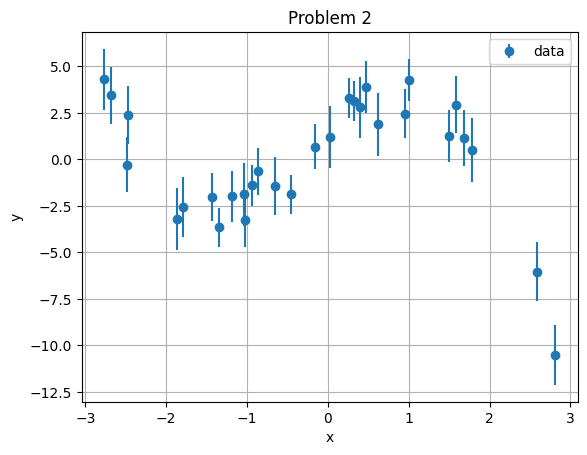

In [99]:
# read in data
mydata = np.loadtxt("problem2.txt")

# make a plot
fig = plt.figure()
ax = plt.gca()

# square root the uncertainties
mydata[:, 2] = np.sqrt(mydata[:, 2])  # from lecture note

ax.errorbar(mydata[:, 0], mydata[:, 1], yerr=mydata[:, 2], fmt="o", label="data")

# set axis labels
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Problem 2")

# add grid
ax.grid(True)

# add legend
ax.legend(["data"], loc="best")

plt.show()

### b. (10 points)

Build a linear-least squares model for the data assuming a cubic model (i.e., degree 3). Solve the system using `scipy.optimize.lsq_linear`. Print out the best-fit model parameters.


In [100]:
# We are minimizing an equation of the form 0.5 * ||A x - b||**2, where A is our model
# and b is our constraints.

# Let's start by building our matrix A from our data. A should be size (n_points, n_parameters),
# where n_points is the number of points I have, and n_parameters is the number of parameters.
# Note that we can incorporate the uncertainty into our model row-by-row. If you need more
# details, look at the lecture notes and/or Numerical Recipes Chapter 15.
# A = ...
# Build the matrix A for a cubic model
n_points = len(mydata)
# we use cubic model, so our number of parameters is 4
n_parameters = 4
# init A matrix
A = np.zeros((n_points, n_parameters))
# fill in the A matrix
# few questions about this one: in the github hint, no / uncertinities
# but in teh lecture note, there is / uncertinities
# so I am not sure which one is correct
for i in range(n_points):
    A[i, 0] = 1 / mydata[i, 2]  # constant term
    A[i, 1] = mydata[i, 0] / mydata[i, 2]  # linear term
    A[i, 2] = mydata[i, 0] ** 2.00 / mydata[i, 2]  # quadratic term
    A[i, 3] = mydata[i, 0] ** 3.00 / mydata[i, 2]  # cubic term


# Now let's define our b vector. This should include both the data themselves and the uncertainties.
# we know that mydata[:, 0] = x and mydata[:, 1] = y and mydata[:, 2] = sigma_y
# b used to specify the constraints
# same for this one too
b = mydata[:, 1] / mydata[:, 2]

# Now we solve the system with lsq_linear:
result = scipy.optimize.lsq_linear(A, b)

# Print out the results
print(result)
print("Best-fit model parameters:")
print("a = {:.6f}".format(result.x[0]))
print("b = {:.6f}".format(result.x[1]))
print("c = {:.6f}".format(result.x[2]))
print("d = {:.6f}".format(result.x[3]))

       message: The unconstrained solution is optimal.
       success: True
        status: 3
           fun: [-1.023e-01  8.853e-02 ... -8.144e-01 -7.469e-01]
             x: [ 1.253e+00  3.624e+00 -5.505e-01 -8.005e-01]
           nit: 0
          cost: 6.552867694063037
    optimality: 8.975598042582078e-13
   active_mask: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00]
 unbounded_sol: (array([ 1.253e+00,  3.624e+00, -5.505e-01, -8.005e-01]), array([ 1.311e+01]), 4, array([ 3.090e+01,  1.207e+01,  3.007e+00,  2.618e+00]))
Best-fit model parameters:
a = 1.252788
b = 3.624351
c = -0.550547
d = -0.800531


### c. (5 points)

Plot the resulting fit, along with the input data.


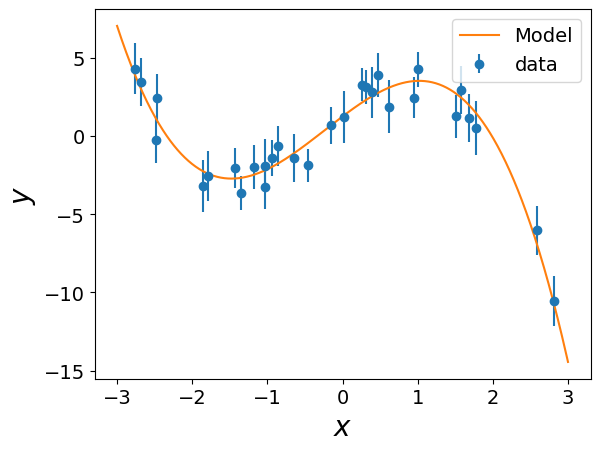

In [101]:
# we'll make a similar plot as before, and also add our best-fit data
fig = plt.figure()
ax = plt.gca()

ax.errorbar(mydata[:, 0], mydata[:, 1], yerr=mydata[:, 2], fmt="o", label="data")

# now add our model
xvals = np.linspace(-3, 3, num=1000)
yvals = (
    result.x[0]
    + result.x[1] * xvals
    + result.x[2] * xvals**2
    + result.x[3] * xvals**3
)
ax.plot(xvals, yvals, label="Model")

# make the plot pretty
ax.set_xlabel("$x$", fontsize=20)
ax.set_ylabel("$y$", fontsize=20)
ax.legend(loc=0, prop={"size": 14})
ax.tick_params(axis="both", labelsize=14)

plt.show()

### d. (5 points)

Compute the goodness-of-fit parameter $Q$ for the data, given the fit and associated uncertainties. Do you think the fit is good?


In [102]:
# compute the chi-square value
# equation = x^2 = summation of i = 1 to N ((y1 - summation of k =1 to M (ak * Xk(xi)) / uncertinities (i))^2))))
# or x^2 = summation((Observation (i) - Expected (i))^2 / Expected(i))
# from lecture note
chi2_2 = np.sum(((mydata[:, 1] - np.dot(A, result.x)) / mydata[:, 2]) ** 2)
observation = mydata[:, 1]
expected = np.dot(A, result.x)
chi2 = scipy.stats.chisquare(observation, expected)[0]

# comapre chi2_2 and chi2 -> this is just the test to see if I do anuthing wrong
print("chi2_2 = {:.6f}".format(chi2_2))
print("chi2 = {:.6f}".format(chi2))
# caluclate % difference
print("chi2_2 - chi2 = {:.6f}".format(chi2_2 - chi2))

# compute the number of degrees of freedom
ndf = n_points - n_parameters

# compute the parameter Q
q = 1 - chi2 / (ndf - 1)

# print out the results
print("Chi-square value: {:.6f}".format(chi2))
print("Number of degrees of freedom: {}".format(ndf))
print("Goodness-of-fit parameter Q: {:.6f}".format(q))

# check q to see if we have a good fit
if q > 0.1:
    print("The fit is good!")
else:
    print("The fit is bad!")

chi2_2 = 24.856534
chi2 = -0.209980
chi2_2 - chi2 = 25.066513
Chi-square value: -0.209980
Number of degrees of freedom: 26
Goodness-of-fit parameter Q: 1.008399
The fit is good!


## Problem 3 (25 points)

The ability to measure distant astronomical objects is limited by the diffraction of light waves as they enter our telescopes. Due to the wave-like nature of light propagation, a photon with a wavelength $\lambda$ passing through a circular aperture is diffracted into a series of concentric rings. The intensity pattern of the light $I(r)$ is given by:

$$
I(r) = \left(\frac{J_1(kr)}{kr}\right)^2,
$$

where $r$ is the distance from the center of the focal plane, $k = 2\pi/\lambda$, and $J_1(x)$ is a Bessel function. The Bessel functions $J_m(x)$ are defined as:

$$
J_m(x) = \frac{1}{\pi} \int_0^\pi \cos(m \theta - x \sin \theta)\;\mathrm{d}\theta,
$$

where $m$ is a non-negative integer and $x \geq 0$.

### a. (10 points)

Write a function that will compute $J_m(x)$ using Simpson's rule with $N = 1000$ points. Use your program to compute the values $J_0$, $J_1$, and $J_2$ over the range $0 \leq x \leq 20$ and plot the result.


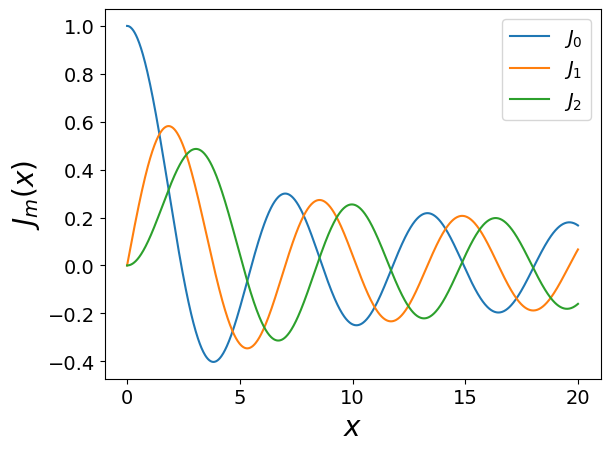

In [103]:
def besselJ(m, x):
    # eq = (1/pi) * integral from 0 to pi of cos(m*theta - x*sin(theta)) dtheta
    # break the interval up into 1000 points
    N = 1000

    #     # evaluate the integrand at each point
    intergrand = np.zeros(N)  # init intergrand
    # np.linespace(start, stop, num) -> (0, pi, 1000) -> 1000 points from 0 to pi
    theta = np.linspace(0, np.pi, N)  # init theta
    for i in range(N):
        intergrand[i] = np.cos(m * theta[i] - x * np.sin(theta[i]))

    # use Simpson's rule to calculate the integral
    # use build in lib to make it easier to calculate the integral
    integral = scipy.integrate.simps(intergrand, theta)

    # give the answer back to the user
    return integral / np.pi


# now let's plot!
xvals = np.linspace(0, 20, num=1000)
j0 = np.array([besselJ(0, x) for x in xvals])
j1 = np.array([besselJ(1, x) for x in xvals])
j2 = np.array([besselJ(2, x) for x in xvals])

fig = plt.figure()
ax = plt.gca()
ax.plot(xvals, j0, label=r"$J_0$")
ax.plot(xvals, j1, label=r"$J_1$")
ax.plot(xvals, j2, label=r"$J_2$")

# make plot pretty
ax.set_xlabel("$x$", fontsize=20)
ax.set_ylabel("$J_m(x)$", fontsize=20)
ax.tick_params(axis="both", labelsize=14)
ax.legend(loc=0, prop={"size": 14})

plt.show()

### b. (15 points)

Make a plot of the circular intensity pattern with $\lambda = 500$ nm, computed using the formula above. Plot over a region over $0 \leq r \leq 1$ mm. _Note_: it may be helpful to know that $\lim_{x \to 0} J_1(x)/x = 1/2$.


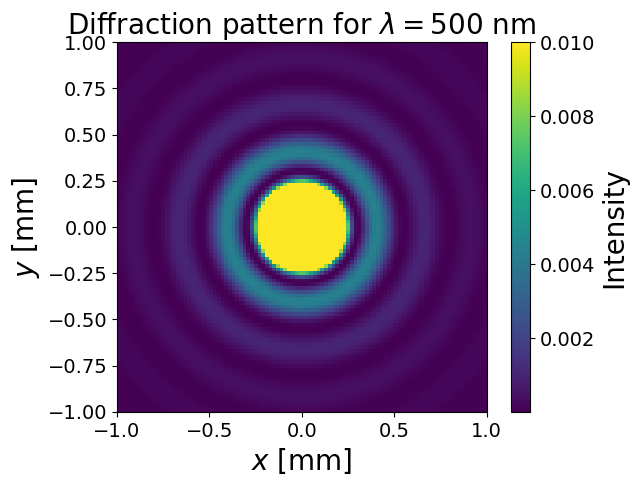

In [104]:
# # Compute the intensity according to the above function.
# # If your function is not vectorized, you may have to
# # iterate through the values of the grid.
#
# ### NOTE! You should only do one of the below choices, and
# ### comment out/delete the other one!
# ivals = ...
# ###
# ### OR
# ###
# ivals = np.zeros_like(RR)
# for i in range(len(RR.shape[0])):
#     for j in range(len(RR.shape[1])):
#         r = RR[i, j]
#         ival = ...
#         ivals[i, j] = ival
# ### END OF OR BLOCK

# define wavelength
lam = 0.5  # 500 nm = 0.5 mm

# define grid of x and y points
x = np.linspace(-1, 1, num=100)  # covering from -1 to 1 mm
y = np.linspace(-1, 1, num=100)
XX, YY = np.meshgrid(x, y)

# convert to grid of radii
RR = np.sqrt(XX**2 + YY**2)


# define a function to compute the intensity
# eq = I(r) = (J1(kr)/kr)^2
# k = 2*pi/lambda
# J = besselJ(1, kr)
def intensity(r, lam):
    # compute necessary intermediate values
    k = 2 * np.pi / lam  # wave number
    x = k * r  # x = k * r * sin(theta)
    j1 = np.vectorize(besselJ)(
        1, x
    )  # vectorize the function so that it can be applied to array

    # return the answer to the user
    return (j1 / x) ** 2


# Compute the intensity according to the above function.
ivals = intensity(RR, lam)

# now make a plot
fig = plt.figure()
ax = plt.gca()

# `extent` defines the values corresponding to the two axes
# `vmax` defines the maximum value for our colorbar
extent = [-1, 1, -1, 1]
vmax = 0.01
im = ax.imshow(ivals, vmax=vmax, extent=extent)
# let's add a colorbar too
cb = plt.colorbar(im)

# add some labels
ax.set_xlabel("$x$ [mm]", fontsize=20)
ax.set_ylabel("$y$ [mm]", fontsize=20)
cb.set_label("Intensity", fontsize=20)
ax.set_title(r"Diffraction pattern for $\lambda = 500$ nm", fontsize=20)
ax.tick_params(axis="both", labelsize=14)
cb.ax.tick_params(labelsize=14)

## Problem 4 (25 points)

Suppose I am flipping a coin, and trying to determine the probability that the next outcome will be heads. I flip the coin, and then write down whether it is heads (`1`) or tails (`0`). The coin will come up heads some fraction of the time $f_H$, where a fair coin has $f_H = 1/2$. However, I don't know the value of $f_H$ _a priori_, and instead am trying to infer it based on my past coin tosses.

Using Bayes' Theorem, we can write down the probability of our bias value $f_H$ given our series of observations $\vec{d}$ as:

$$
P\left(f_H | \vec{d}\right) = \frac{P\left(\vec{d} | f_H\right)P(f_H)}{P\left(\vec{d}\right)}.
$$

We can evaluate this given all of our data, or we can incrementally update it based on the output of each of our trials. Let's focus on the latter case.

### a. (2 points)

Read in the data saved at `coin1.txt`. This represents the outcomes of our coin tosses, where "heads" is represented by a `1` and "tails" is represented by a `0`.


In [23]:
coin1_data = np.loadtxt("coin1.txt")

### b. (3 points)

Write a pair of functions that will compute the likelihood term $P(\vec{d}|f_H)$. In our case, we are going to focus on the outcome of a single trial, heads or tails, and writing that likelihood in terms of our bias $f_H$. Note that we define our $f_H$ here, which is bound to be between 0 and 1.


In [24]:
fH = np.linspace(0, 1, num=1000)


def heads_likelihood(fH):
    return fH


def tails_likelihood(fH):
    return 1 - fH

### c. (5 points)

Write a function that will compute the evidence (or normalization) term $P(\vec{d})$. In this case, we just want to make sure our probability is normalized, so we can cheat a bit and implement it as an average of the product of the arrays in our numerator.


In [25]:
def evidence(likelihood, prior):
    # compute the numerator of Bayes' theorem
    numerator = likelihood * prior

    # compute the evidence by averaging the numerator over all possible values of fH
    evidence = np.trapz(numerator, fH)

    # return the answer to the user
    return evidence

### d. (5 points)

Fill in the code below to perform a "Bayesian update" step for the result of each coin flip. We will also be plotting the resulting distribution. We are going to do some special hackery so that our line color changes according to a color map so we can keep track of the evolution of our distribution. We are also going to check that our function remains normalized by doing a numeric integral at each iteration.


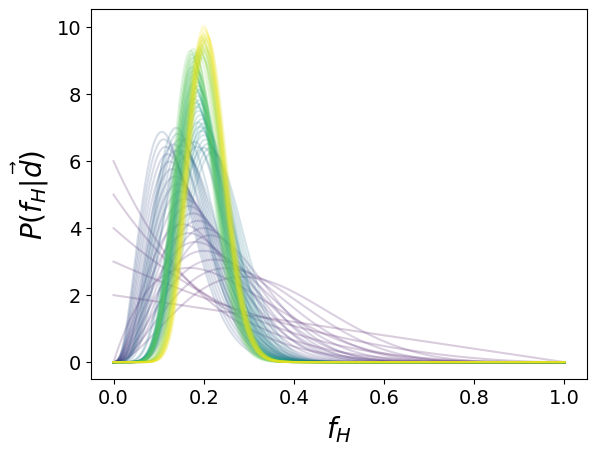

In [26]:
import warnings
from scipy.integrate import quad

warnings.filterwarnings("ignore")

fig = plt.figure()
ax = plt.gca()

prior = np.ones_like(fH)  # define our initial prior--should be flat!

colors = plt.cm.viridis(np.linspace(0, 1, num=len(coin1_data)))

for i, flip in enumerate(coin1_data):
    # determine if heads or tails
    if flip == 1:
        lik = heads_likelihood(fH)
    else:
        lik = tails_likelihood(fH)

    ev = evidence(lik, prior)

    posterior = lik * prior / ev

    # Make sure we're still normalized
    # NOTE: Do *not* comment this out! If the error is being
    # raised, you have not normalized your system properly!
    def integrand(x):
        return np.interp(x, fH, posterior)

    area = quad(integrand, 0, 1)[0]
    if not np.isclose(area, 1.0, atol=1e-2):
        raise ValueError(f"Integral is not normalized! Area: {area}")

    # plot the posterior
    ax.plot(fH, posterior, alpha=0.2, color=colors[i])

    # update the prior
    prior = posterior

# make plot pretty
ax.set_xlabel(r"$f_H$", fontsize=20)
ax.set_ylabel(r"$P(f_H|\vec{d})$", fontsize=20)
ax.tick_params(which="both", labelsize=14)

### e. (5 points)

Compute the expected value for $f_H$ given the final posterior after all of the coin flips above.


In [27]:
def compute_ev(posterior):
    # compute the expected value by integrating fH times the posterior over all possible values of fH
    ev = np.trapz(fH * posterior, fH)

    # return the answer to the user
    return ev

### f. (5 points)

Repeat parts (d) and (e) for the second set of coin flips, `coin2.txt`. What value do you find for $f_H$?


Expected value of fH: 0.6485148514851484


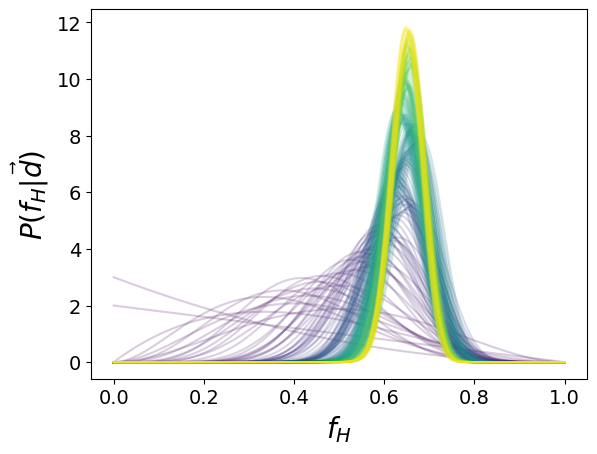

In [29]:
coin2_data = np.loadtxt("coin2.txt")

warnings.filterwarnings("ignore")

fig = plt.figure()
ax = plt.gca()

prior = np.ones_like(fH)  # define our initial prior--should be flat!

colors = plt.cm.viridis(np.linspace(0, 1, num=len(coin2_data)))

for i, flip in enumerate(coin2_data):
    # determine if heads or tails
    if flip == 1:
        lik = heads_likelihood(fH)
    else:
        lik = tails_likelihood(fH)

    ev = evidence(lik, prior)

    posterior = lik * prior / ev

    # Make sure we're still normalized
    # NOTE: Do *not* comment this out! If the error is being
    # raised, you have not normalized your system properly!
    def integrand(x):
        return np.interp(x, fH, posterior)

    area = quad(integrand, 0, 1)[0]
    if not np.isclose(area, 1.0, atol=1e-2):
        raise ValueError(f"Integral is not normalized! Area: {area}")

    # plot the posterior
    ax.plot(fH, posterior, alpha=0.2, color=colors[i])

    # update the prior
    prior = posterior

# make plot pretty
ax.set_xlabel(r"$f_H$", fontsize=20)
ax.set_ylabel(r"$P(f_H|\vec{d})$", fontsize=20)
ax.tick_params(which="both", labelsize=14)

# compute the expected value of fH
ev = compute_ev(posterior)
print(f"Expected value of fH: {ev}")